## Clustering Challenge 4.1.10

* Data set is the Date Fruits Datasets, obtained at: https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets

>* DATASET: https://www.muratkoklu.com/datasets/
>* Citation Request :
>* KOKLU, M., KURSUN, R., TASPINAR, Y. S., and CINAR, I. (2021). Classification of Date Fruits into Genetic >* Varieties Using Image Analysis. Mathematical Problems in Engineering, Vol.2021, Article ID: 4793293,
>* DOI:10.1155/2021/4793293

* The data contains seven classes of dates and thirty-four features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel(r"F:\DataSets\Date_Fruit_Datasets\Date_Fruit_Datasets.xlsx")

### Data Cleaning

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [3]:
df.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  422163   2378.908    837.8484    645.6693        0.6373  733.1539   
1  338136   2085.144    723.8198    595.2073        0.5690  656.1464   
2  526843   2647.394    940.7379    715.3638        0.6494  819.0222   
3  416063   2351.210    827.9804    645.2988        0.6266  727.8378   
4  347562   2160.354    763.9877    582.8359        0.6465  665.2291   

   SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRR  KurtosisRG  \
0    0.9947       424428  0.7831        1.2976  ...      3.2370      2.9574   
1    0.9974       339014  0.7795        1.2161  ...      2.6228      2.6350   
2    0.9962       528876  0.7657        1.3150  ...      3.7516      3.8611   
3    0.9948       418255  0.7759        1.2831  ...      5.0401      8.6136   
4    0.9908       350797  0.7569        1.3108  ...      2.7016      2.9761   

   KurtosisRB    EntropyRR    EntropyRG    EntropyRB  ALLdaub4RR  ALLdaub4RG  \
0      4.2287 -59191263232 -50714214400 -39922372608     58.7255     54.9554   
1      3.1704 -34233065472 -37462601728 -31477794816     50.0259     52.8168   
2      4.7192 -93948354560 -74738221056 -60311207936     65.4772     59.2860   
3      8.2618 -32074307584 -32060925952 -29575010304     43.3900     44.1259   
4      4.4146 -39980974080 -35980042240 -25593278464     52.7743     50.9080   

   ALLdaub4RB  Class  
0     47.8400  BERHI  
1     47.8315  BERHI  
2     51.9378  BERHI  
3     41.1882  BERHI  
4     42.6666  BERHI  

[5 rows x 35 columns]

In [4]:
df.shape

(898, 35)

In [5]:
df.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [6]:
duplicate_mask = df.duplicated()
duplicate_rows = df[duplicate_mask]

print(duplicate_rows)

Empty DataFrame
Columns: [AREA, PERIMETER, MAJOR_AXIS, MINOR_AXIS, ECCENTRICITY, EQDIASQ, SOLIDITY, CONVEX_AREA, EXTENT, ASPECT_RATIO, ROUNDNESS, COMPACTNESS, SHAPEFACTOR_1, SHAPEFACTOR_2, SHAPEFACTOR_3, SHAPEFACTOR_4, MeanRR, MeanRG, MeanRB, StdDevRR, StdDevRG, StdDevRB, SkewRR, SkewRG, SkewRB, KurtosisRR, KurtosisRG, KurtosisRB, EntropyRR, EntropyRG, EntropyRB, ALLdaub4RR, ALLdaub4RG, ALLdaub4RB, Class]
Index: []

[0 rows x 35 columns]


In [7]:
duplicate_columns = df.columns.duplicated()
duplicated_columns_list = df.columns[duplicate_columns].tolist()

print(duplicated_columns_list)

[]


In [8]:
df.describe()

AREA    PERIMETER   MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
count     898.000000   898.000000   898.000000  898.000000    898.000000   
mean   298295.207127  2057.660953   750.811994  495.872785      0.737468   
std    107245.205337   410.012459   144.059326  114.268917      0.088727   
min      1987.000000   911.828000   336.722700    2.283200      0.344800   
25%    206948.000000  1726.091500   641.068650  404.684375      0.685625   
50%    319833.000000  2196.345450   791.363400  495.054850      0.754700   
75%    382573.000000  2389.716575   858.633750  589.031700      0.802150   
max    546063.000000  2811.997100  1222.723000  766.453600      1.000000   

          EQDIASQ    SOLIDITY    CONVEX_AREA      EXTENT  ASPECT_RATIO  ...  \
count  898.000000  898.000000     898.000000  898.000000    898.000000  ...   
mean   604.577938    0.981840  303845.592428    0.736267      2.131102  ...   
std    119.593888    0.018157  108815.656947    0.053745     17.820778  ...   
min     50.298400    0.836600    2257.000000    0.512300      1.065300  ...   
25%    513.317075    0.978825  210022.750000    0.705875      1.373725  ...   
50%    638.140950    0.987300  327207.000000    0.746950      1.524150  ...   
75%    697.930525    0.991800  388804.000000    0.775850      1.674750  ...   
max    833.827900    0.997400  552598.000000    0.856200    535.525700  ...   

           SkewRB  KurtosisRR  KurtosisRG  KurtosisRB     EntropyRR  \
count  898.000000  898.000000  898.000000  898.000000  8.980000e+02   
mean     0.250518    4.247845    5.110894    3.780928 -3.185021e+10   
std      0.632918    2.892357    3.745463    2.049831  2.037241e+10   
min     -1.029100    1.708200    1.607600    1.767200 -1.091224e+11   
25%     -0.196950    2.536625    2.508850    2.577275 -4.429444e+10   
50%      0.135550    3.069800    3.127800    3.080700 -2.826156e+10   
75%      0.593950    4.449850    7.320400    4.283125 -1.460482e+10   
max      3.092300   26.171100   26.736700   32.249500 -1.627316e+08   

          EntropyRG     EntropyRB  ALLdaub4RR  ALLdaub4RG  ALLdaub4RB  
count  8.980000e+02  8.980000e+02  898.000000  898.000000  898.000000  
mean  -2.901860e+10 -2.771876e+10   50.082888   48.805681   48.098393  
std    1.712952e+10  1.484137e+10   16.063125   14.125911   10.813862  
min   -9.261697e+10 -8.747177e+10   15.191100   20.524700   22.130000  
25%   -3.894638e+10 -3.564534e+10   38.224425   38.654525   39.250725  
50%   -2.620990e+10 -2.392928e+10   53.841300   50.337800   49.614100  
75%   -1.433105e+10 -1.660367e+10   63.063350   59.573600   56.666675  
max   -5.627727e+08 -4.370435e+08   79.828900   83.064900   74.104600  

[8 rows x 34 columns]

* The data consists of 35 columns and 898 rows
* The data types are float64(29), int64(5), object(1)
* The data contained no duplicate or null entries
* The target column is ['Class']
* The data does contain large differences in value amounts and therefore will be normalized

### Data Exploration

In [9]:
class_counts = df['Class'].value_counts()
print(class_counts)

Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64


In [10]:
class_counts_pct = (class_counts / class_counts.sum()) * 100
print(class_counts_pct)

Class
DOKOL     22.717149
SAFAVI    22.160356
ROTANA    18.485523
DEGLET    10.913140
SOGAY     10.467706
IRAQI      8.017817
BERHI      7.238307
Name: count, dtype: float64


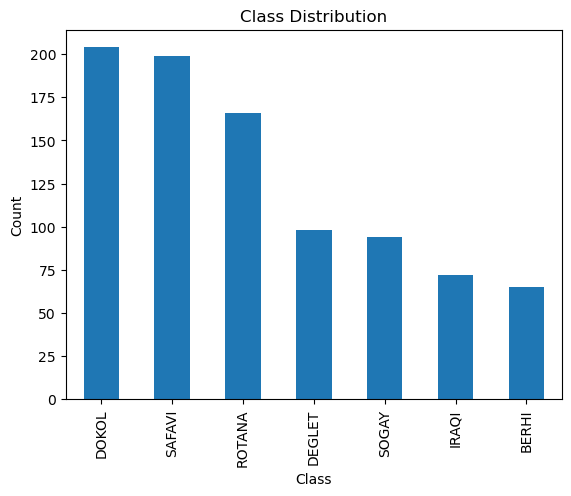

In [11]:
class_counts.plot(kind='bar')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

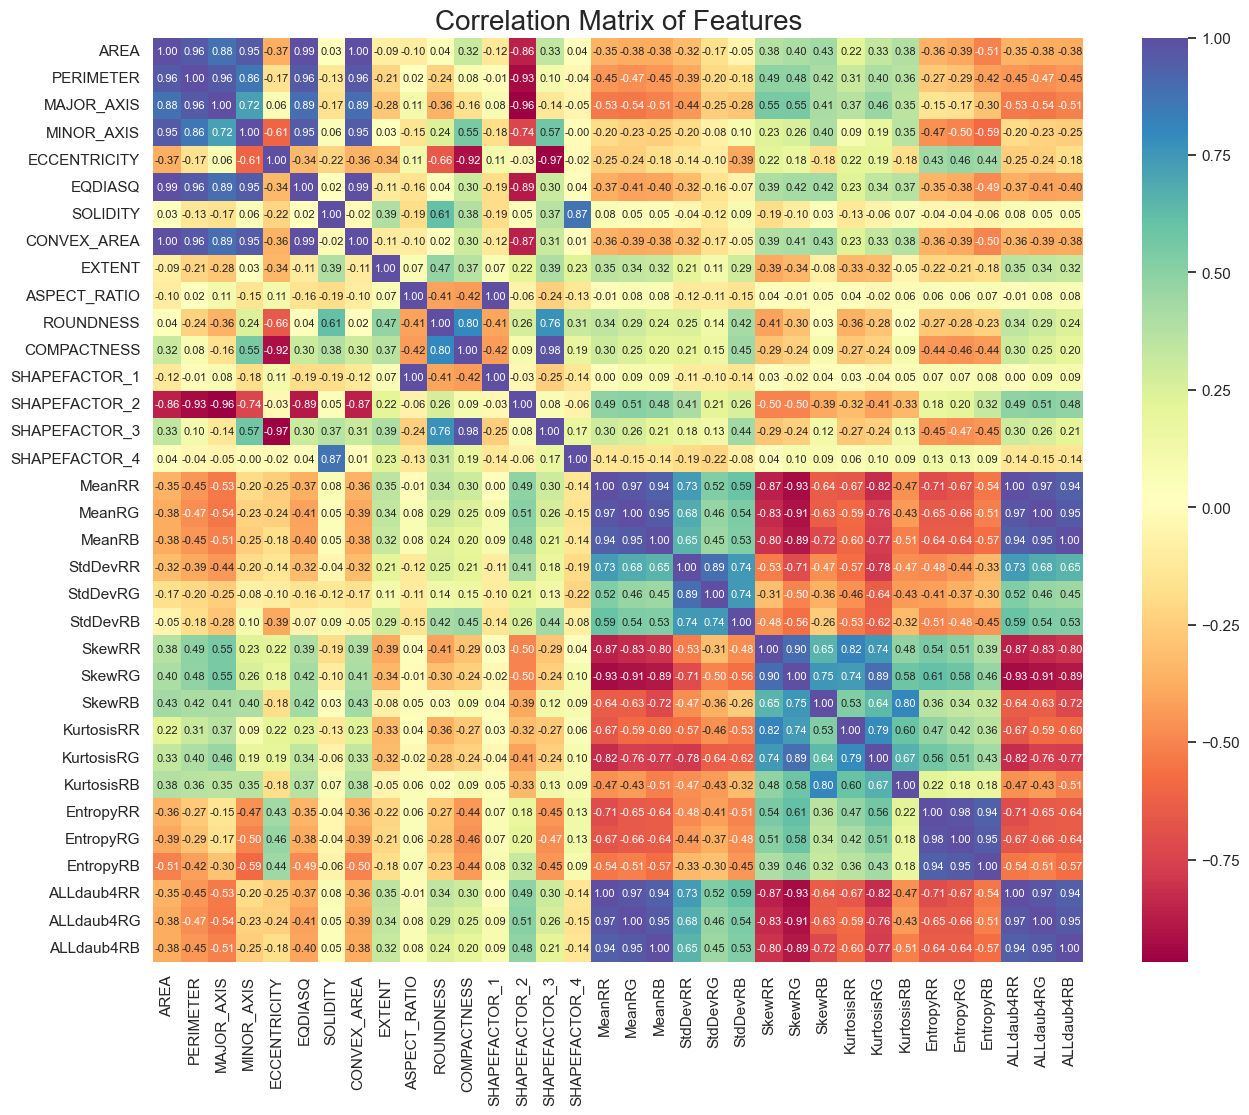

In [12]:
target_col = 'Class'
y = df[target_col]

# Drop non-numeric and target columns from the DataFrame:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]
df_numeric = df_numeric.drop(columns=[target_col], errors='ignore')

# Create the correlation matrix using the new DataFrame:
correlation_matrix = df_numeric.corr()

sns.set(font_scale=1.0)

# Create a heatmap of the correlation matrix:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Spectral", annot_kws={'fontsize':8})
ax.set_title("Correlation Matrix of Features", fontsize=20)
plt.show()

In [13]:
df_numeric.corr()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
AREA           1.000000   0.956494    0.878893    0.954899     -0.370303   
PERIMETER      0.956494   1.000000    0.960734    0.859990     -0.166816   
MAJOR_AXIS     0.878893   0.960734    1.000000    0.721133      0.063090   
MINOR_AXIS     0.954899   0.859990    0.721133    1.000000     -0.607120   
ECCENTRICITY  -0.370303  -0.166816    0.063090   -0.607120      1.000000   
EQDIASQ        0.993243   0.959938    0.886277    0.948006     -0.335085   
SOLIDITY       0.027371  -0.133857   -0.166982    0.059613     -0.220434   
CONVEX_AREA    0.998886   0.963489    0.886948    0.951470     -0.356565   
EXTENT        -0.086286  -0.214632   -0.279951    0.028003     -0.342775   
ASPECT_RATIO  -0.095342   0.018308    0.111631   -0.150407      0.110238   
ROUNDNESS      0.044346  -0.235744   -0.355258    0.243655     -0.659626   
COMPACTNESS    0.315197   0.078554   -0.164403    0.551966     -0.917470   
SHAPEFACTOR_1 -0.124025  -0.011718    0.081976   -0.176214      0.114084   
SHAPEFACTOR_2 -0.861870  -0.934379   -0.959569   -0.736051     -0.026945   
SHAPEFACTOR_3  0.332349   0.103959   -0.136056    0.572201     -0.967224   
SHAPEFACTOR_4  0.039321  -0.036744   -0.048096   -0.004244     -0.020083   
MeanRR        -0.353447  -0.451033   -0.530236   -0.196257     -0.252334   
MeanRG        -0.380730  -0.468553   -0.538479   -0.231831     -0.238878   
MeanRB        -0.376241  -0.448371   -0.506743   -0.246280     -0.180566   
StdDevRR      -0.320764  -0.386137   -0.442289   -0.196623     -0.142801   
StdDevRG      -0.172480  -0.201908   -0.248626   -0.077724     -0.097034   
StdDevRB      -0.048223  -0.176466   -0.284034    0.095411     -0.393799   
SkewRR         0.376400   0.488147    0.551523    0.229831      0.223854   
SkewRG         0.401733   0.484734    0.550014    0.259649      0.184643   
SkewRB         0.433323   0.415364    0.412055    0.396219     -0.177619   
KurtosisRR     0.218253   0.313334    0.366579    0.093267      0.215284   
KurtosisRG     0.326335   0.398168    0.460468    0.189532      0.194135   
KurtosisRB     0.381096   0.364269    0.347940    0.354742     -0.179358   
EntropyRR     -0.359332  -0.266206   -0.146311   -0.466776      0.431537   
EntropyRG     -0.393124  -0.294308   -0.167972   -0.501442      0.463969   
EntropyRB     -0.506256  -0.416802   -0.297395   -0.585234      0.442189   
ALLdaub4RR    -0.353446  -0.451028   -0.530231   -0.196256     -0.252331   
ALLdaub4RG    -0.380747  -0.468571   -0.538497   -0.231847     -0.238875   
ALLdaub4RB    -0.376277  -0.448409   -0.506782   -0.246312     -0.180563   

                EQDIASQ  SOLIDITY  CONVEX_AREA    EXTENT  ASPECT_RATIO  ...  \
AREA           0.993243  0.027371     0.998886 -0.086286     -0.095342  ...   
PERIMETER      0.959938 -0.133857     0.963489 -0.214632      0.018308  ...   
MAJOR_AXIS     0.886277 -0.166982     0.886948 -0.279951      0.111631  ...   
MINOR_AXIS     0.948006  0.059613     0.951470  0.028003     -0.150407  ...   
ECCENTRICITY  -0.335085 -0.220434    -0.356565 -0.342775      0.110238  ...   
EQDIASQ        1.000000  0.018777     0.993397 -0.112353     -0.157370  ...   
SOLIDITY       0.018777  1.000000    -0.016449  0.392552     -0.189234  ...   
CONVEX_AREA    0.993397 -0.016449     1.000000 -0.107403     -0.095457  ...   
EXTENT        -0.112353  0.392552    -0.107403  1.000000      0.067207  ...   
ASPECT_RATIO  -0.157370 -0.189234    -0.095457  0.067207      1.000000  ...   
ROUNDNESS      0.035564  0.611010     0.015083  0.470357     -0.410407  ...   
COMPACTNESS    0.301535  0.384826     0.297794  0.365187     -0.422474  ...   
SHAPEFACTOR_1 -0.186715 -0.188307    -0.124221  0.072829      0.999515  ...   
SHAPEFACTOR_2 -0.887398  0.047237    -0.865527  0.216175     -0.055882  ...   
SHAPEFACTOR_3  0.304564  0.367759     0.313861  0.394855     -0.243065  ...   
SHAPEFACTOR_4  0.037291  0.874596     0.005152  0.229890     -0.134463  ...   
MeanRR        -

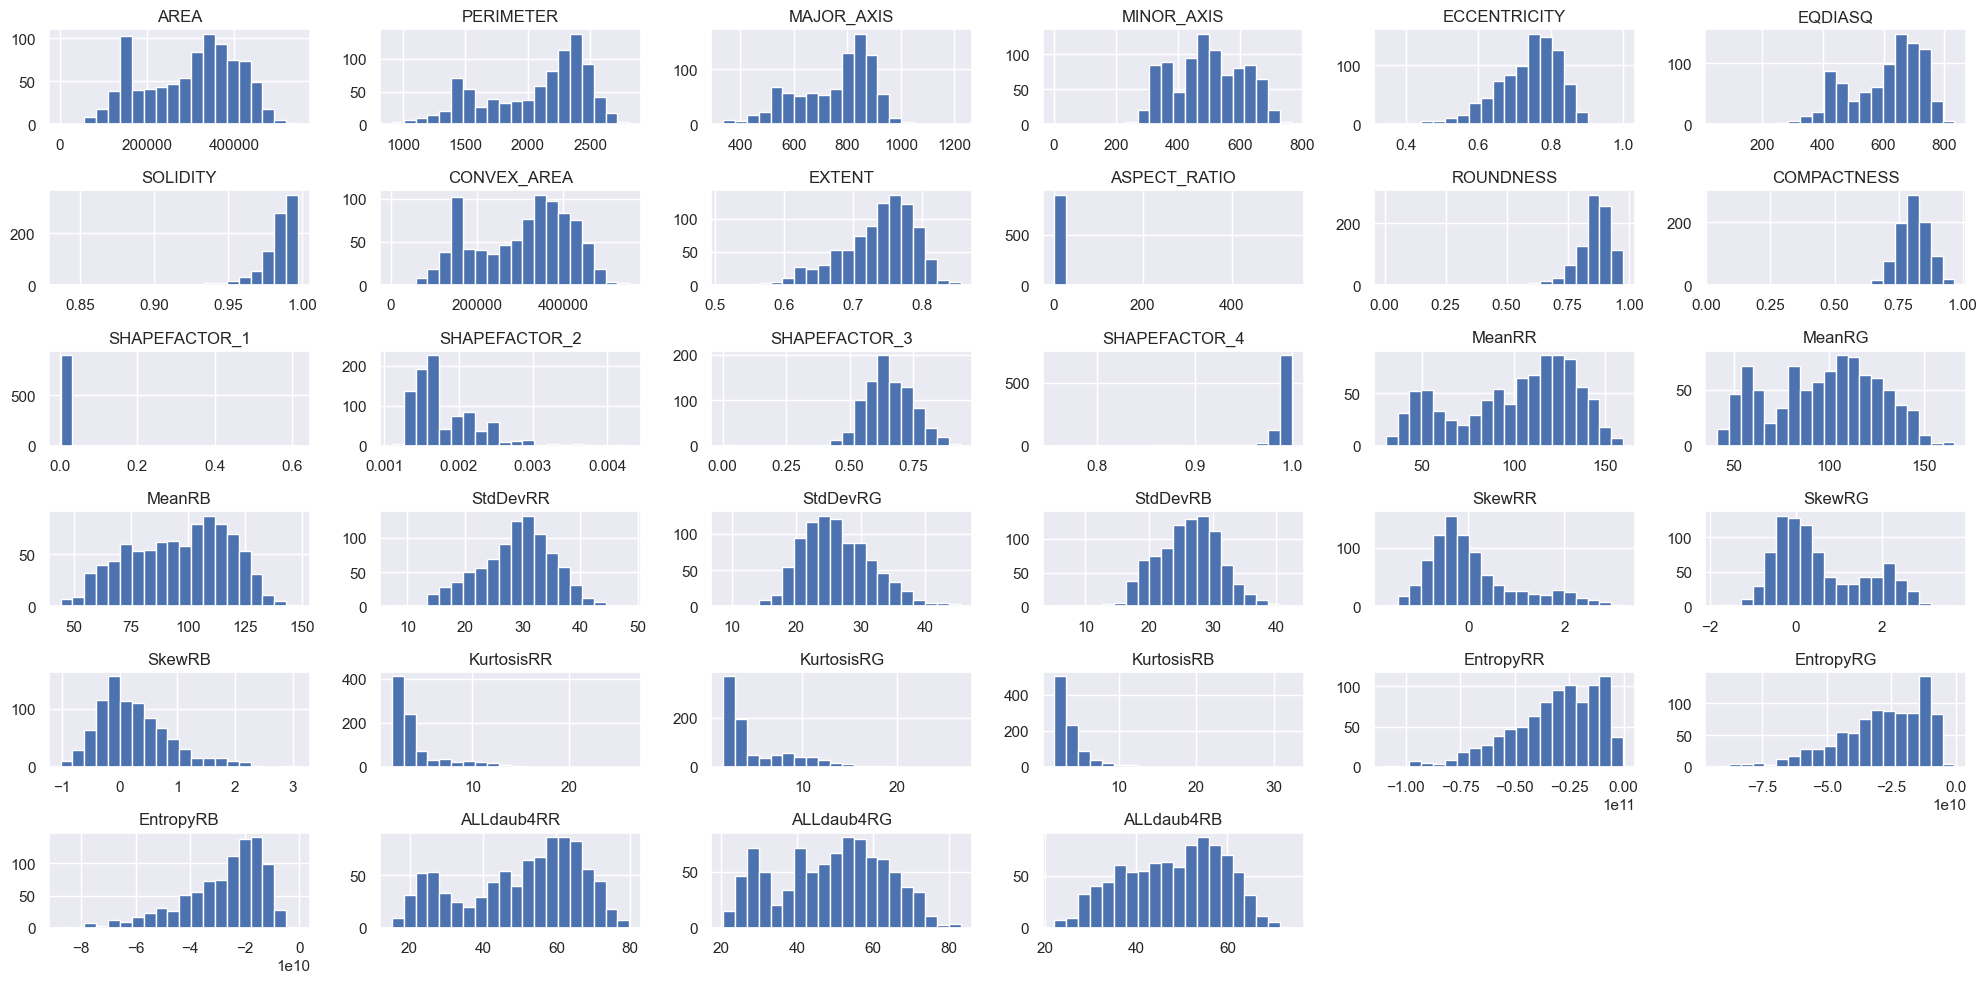

In [14]:
df_numeric.hist(bins=20, figsize=(20, 10))
plt.tight_layout()
plt.show()

* The distribution of data is unbalanced
* The majority of the data shows low to mid level multicolinearity while the remaining display high level multicolinearity
* None of the independent features are normally distributed

### Modeling

In [15]:
from pycaret.clustering import *
cluster = setup(df, ignore_features = ['Class'], normalize = True, session_id = 123)

* Selection of Models

In [16]:
models()

Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean Shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   
kmodes                   K-Modes Clustering   

                                                   Reference  
ID                                                            
kmeans                        sklearn.cluster._kmeans.KMeans  
ap         sklearn.cluster._affinity_propagation.Affinity...  
meanshift              sklearn.cluster._mean_shift.MeanShift  
sc              sklearn.cluster._spectral.SpectralClustering  
hclust     sklearn.cluster._agglomerative.AgglomerativeCl...  
dbscan                        sklearn.cluster._dbscan.DBSCAN  
optics                        sklearn.cluster._optics.OPTICS  
birch                           sklearn.cluster._birch.Birch  
kmodes                                  kmodes.kmodes.KModes

* K-means, Agglomerative, and DBSCAN models will be analyzed.

### K-means

In [17]:
# 7 clusters are chosen because we have a known truth of how many classes of dates are in the data

kmeans = create_model('kmeans', num_clusters = 7)

In [18]:
kmeans_results = assign_model(kmeans)

In [19]:
plot_model(kmeans)

In [20]:
plot_model(kmeans, plot = 'tsne')

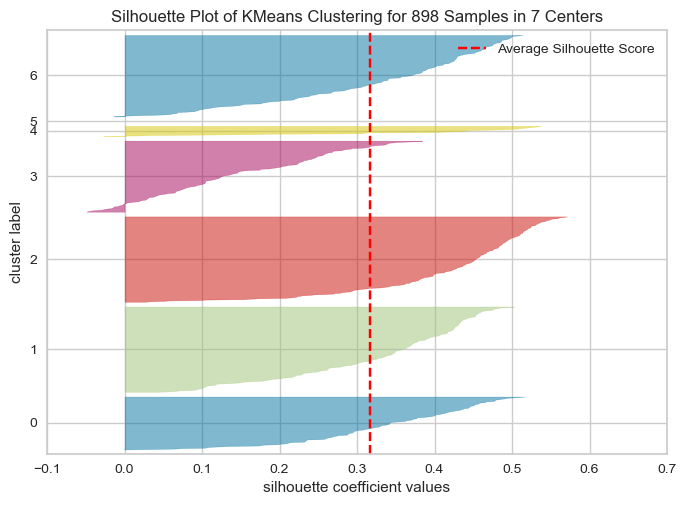

In [21]:
plot_model(kmeans, plot = 'silhouette')

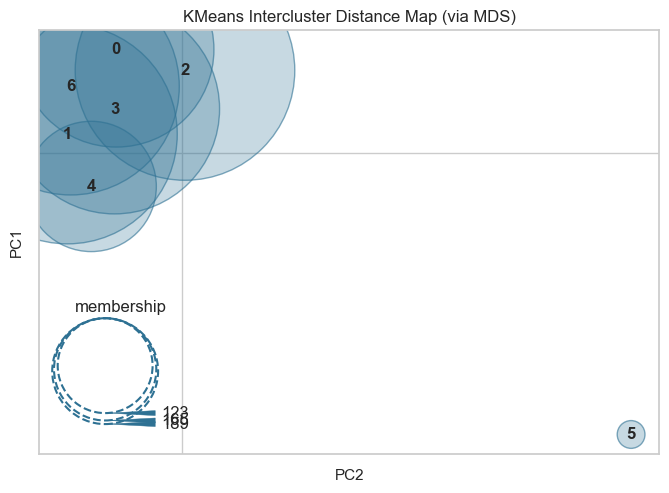

In [22]:
plot_model(kmeans, plot = 'distance')

In [23]:
plot_model(kmeans, plot = 'distribution')

In [24]:
predictions = predict_model(kmeans, data=df)

In [25]:
from pycaret.clustering import *
from sklearn.metrics import adjusted_rand_score

train_ari_score = adjusted_rand_score(df['Class'], predictions['Cluster'])

test = df.drop(columns=['Class'])
test_predictions = predict_model(kmeans, data=test)

test_ari_score = adjusted_rand_score(df['Class'][:len(test_predictions)], test_predictions['Cluster'])

print('ARI score on training set:', round(train_ari_score, 3))
print('ARI score on test set:', round(test_ari_score, 3))

ARI score on training set: 0.686
ARI score on test set: 0.686


### Hierarchical clustering

In [26]:
parameters = {'linkage':'ward','affinity':'euclidean','n_clusters':7}

agg = create_model('hclust',**parameters)

In [27]:
predictions = assign_model(agg)

# extract the true cluster labels from the data
true_labels = df['Class']

# extract the predicted cluster assignments from the HCLUST model
predicted_labels = predictions['Cluster']

# compute the ARI score between the true and predicted cluster assignments
ari = adjusted_rand_score(true_labels, predicted_labels)

# print the ARI score
print("Adjusted Rand Index: {:.4f}".format(ari))

Adjusted Rand Index: 0.5937


In [28]:
plot_model(agg, plot='cluster')

In [29]:
parameters = {'linkage':'complete','affinity':'cosine','n_clusters':7}

agg = create_model('hclust',**parameters)

In [30]:
predictions = assign_model(agg)

# extract the true cluster labels from the data
true_labels = df['Class']

# extract the predicted cluster assignments from the HCLUST model
predicted_labels = predictions['Cluster']

# compute the ARI score between the true and predicted cluster assignments
ari = adjusted_rand_score(true_labels, predicted_labels)

# print the ARI score
print("Adjusted Rand Index: {:.4f}".format(ari))

Adjusted Rand Index: 0.5993


In [31]:
plot_model(agg, plot='cluster')

* Hierarchical clustering did not improve upon the K-means model.
* The highest Silouhette score is 0.31 was 0.60
* The PCA plots do not show good group separation amoung clusters 1, 2, 0
* Cluster 3 is well separated

### DBSCAN

In [32]:
db = create_model('dbscan', eps=0.5, min_samples=5)

In [33]:
plot_model(db, plot='cluster')

In [34]:
db = create_model('dbscan', eps=1.0, min_samples=10)

In [35]:
plot_model(db, plot='cluster')

* The DBSCAN model was unable to separate any clusters

### Summary
<br>
* Although the K-means model had the best grouping visually and the highest Silhouette score (0.32) the score still indicated a poorly perfoming model. The PCA plot indicated that the clusters are not radially symmetrical. Also the data displayed possible outliers based on the PCA plot and distribution of clusters. One cluster had only one observation. The model may be improved with further data pre-processing to remove outliers etc.

<br>
* Although I'm positive with further feature engineering the model would perform much better the challenge proved to me that just as at the grocery store it's not that easy to tell different varients of a fruit apart!